<a href="https://colab.research.google.com/github/trikialaa/ComputerVisionBasics/blob/master/Object_contouring_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [0]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

# **Loading image**

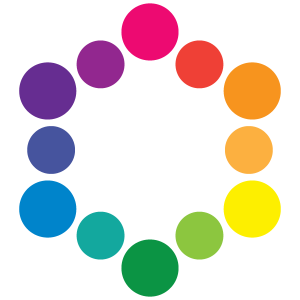

In [4]:
img = cv2.imread('colors.png')
cv2_imshow(img)

# **Converting image to gray scale**

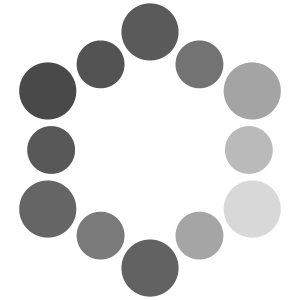

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# **Edge detection**

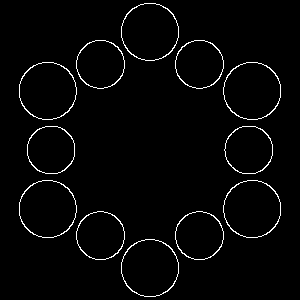

In [17]:
edged = cv2.Canny(gray,30,60)
cv2_imshow(edged)

# **Thresholding**

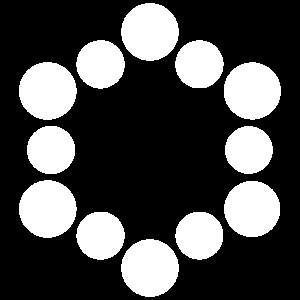

In [26]:
threshold = cv2.threshold(gray,217,255,cv2.THRESH_BINARY_INV)[1]
cv2_imshow(threshold)

# **Image contouring**

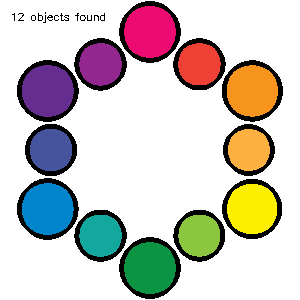

In [42]:
cont = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
img_cont = img.copy()

i = 0

for ct in cont:
  cv2.drawContours(img_cont, [ct], -1, (0,0,0), 3)
  i+=1

cv2.putText(img_cont, "{} objects found".format(i), (10,20), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0,0,0), 1)
cv2_imshow(img_cont)

# **Erosion**

Original


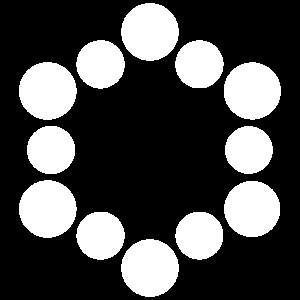

Eroded


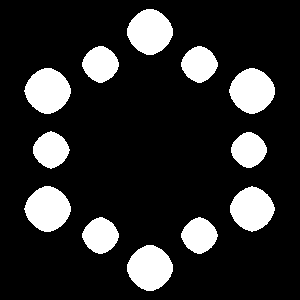

In [49]:
mask = threshold.copy()
img_ero = cv2.erode(mask, None, iterations=5)
print("Original")
cv2_imshow(threshold)
print("Eroded")
cv2_imshow(img_ero)

# **Dilatation**

Original


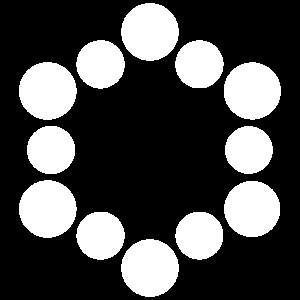

Dilated


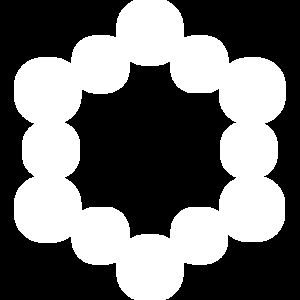

In [51]:
mask = threshold.copy()
img_dil = cv2.dilate(mask, None, iterations=5)
print("Original")
cv2_imshow(threshold)
print("Dilated")
cv2_imshow(img_dil)

# **Masking**

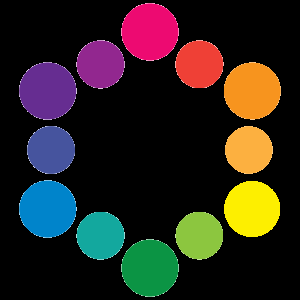

In [57]:
mask = threshold.copy()
img_masked = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(img_masked)